## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Plot function

In [2]:
def plot(dqn4,dqn10,drqn):
    """
    Plots the reward trend from a CSV file.

    Args:
        csv_file (str): Path to the CSV file containing reward data.
    """
    df4 = pd.read_csv(dqn4)
    df10 = pd.read_csv(dqn10)
    dfr = pd.read_csv(drqn, header=None)
    
    l = 498

    WINDOW_FOR_MOVING_AVG = 40
    index_vector = range(l)

    plt.figure(figsize=(10,8))

    df4["evm_avg"] = df4['total_reward'].ewm(span=WINDOW_FOR_MOVING_AVG).mean() 
    df10["evm_avg"] = df10['total_reward'].ewm(span=WINDOW_FOR_MOVING_AVG).mean()
    dfr["evm_avg"] = dfr[0].ewm(span=WINDOW_FOR_MOVING_AVG).mean()
    
    
    plt.title("Performance Score Variation for Non-Flickering environment(POMDP)")
    plt.plot(index_vector, df4["evm_avg"][:l], label="DQN 4 frames", color = 'blue')
    plt.plot(index_vector, df10["evm_avg"][:l], label="DQN 10 frames", color = 'green')
    plt.plot(index_vector, dfr["evm_avg"][:l], label="DRQN 1 frame", color='orange')
    plt.xlabel("Episode Number")
    plt.ylabel("Reward")
    plt.legend()
    plt.show()

## Define csv filenames and plot

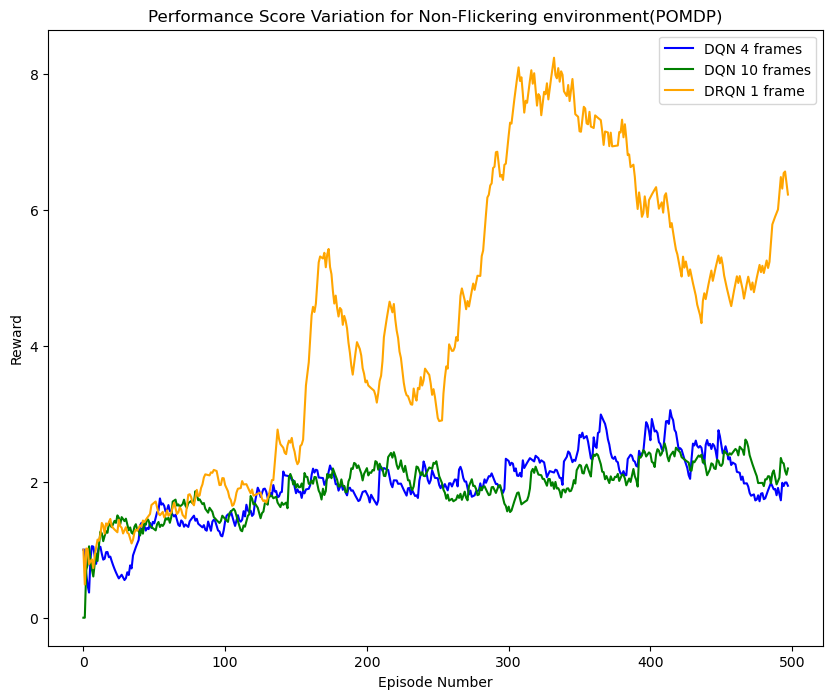

In [3]:
dqn4 = 'data/dqn_breakout_skip_4frames.csv'
dqn10 = 'data/dqn_breakout_skip_10frames.csv'
drqn = 'data/drqn_breakout_skip.csv'

plot(dqn4,dqn10,drqn)
